# CSV mit Python verarbeiten (matplotlib)

Python bietet mit der [pandas Library](https://pandas.pydata.org/index.html) ein mächtiges Werkzeug um strukturierte Daten zu verarbeiten. Die Daten können dabei sehr einfach visualisiert, verbunden oder explorativ analysiert werden.

Die Visualisierungen von Pandas basieren auf [matplotlib](https://matplotlib.org/), einer Library für Datenvisualisierungen als Plots.

In diesem Notebook soll dies ein einem Beispiel gezeigt werden. Als Beispiel-Datensatz nehmen wir den Datensatz [«Aufenthaltsdauer der Wohnbevölkerung nach Alter, Geschlecht, Herkunft und Stadtkreis»](https://data.stadt-zuerich.ch/dataset/bev_aufenthaltsdauer_bestand_alter_geschlecht_herkunft_stadtkreis_seit1993_od5241). Dieser Datensatz beinhaltet keine Einzeldaten, sondern bereits aggregierte Werte (Median, 25 Perzentile, 75 Perzentile, Durchschnitt).

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [4]:
result = requests.get(
    'https://data.stadt-zuerich.ch/api/3/action/package_show?id=bev_aufenthaltsdauer_bestand_alter_geschlecht_herkunft_stadtkreis_seit1993_od5241'
)
dataset = result.json()['result']
stay_url = dataset['resources'][0]['url']
df = pd.read_csv(stay_url)
df

,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
0,1993,0-19,1,1,M,1,Schweizer/in,1,Kreis 1,2.05,6.00,11.30,7.0
1,1993,0-19,1,1,M,1,Schweizer/in,2,Kreis 2,2.80,6.80,11.80,7.5
2,1993,0-19,1,1,M,1,Schweizer/in,3,Kreis 3,3.00,7.10,11.90,7.6
3,1993,0-19,1,1,M,1,Schweizer/in,4,Kreis 4,2.20,5.70,10.40,6.7
4,1993,0-19,1,1,M,1,Schweizer/in,5,Kreis 5,2.00,5.70,11.10,6.8
5,1993,0-19,1,1,M,1,Schweizer/in,6,Kreis 6,2.80,6.80,11.70,7.5
6,1993,0-19,1,1,M,1,Schweizer/in,7,Kreis 7,3.00,6.90,11.60,7.4
7,1993,0-19,1,1,M,1,Schweizer/in,8,Kreis 8,2.50,5.85,10.95,7.1
8,1993,0-19,1,1,M,1,Schweizer/in,9,Kreis 9,3.20,7.40,12.00,7.8
9,1993,0-19,1,1,M,1,Schweizer/in,10,Kreis 10,2.80,6.60,10.70,7.1


## Schauen wir uns doch mal ein paar Aggregrationen an, um ein Gefühl für den Inhalt des Dataframes zu bekommen

In [38]:
df.groupby(['StichtagDatJahr', 'KreisLang', 'KreisCd']).size().reset_index(name='counts').sort_values(by=['StichtagDatJahr', 'KreisCd']).reset_index(drop=True)

,StichtagDatJahr,KreisLang,KreisCd,counts
0,1993,Kreis 1,1,21
1,1993,Kreis 2,2,20
2,1993,Kreis 3,3,20
3,1993,Kreis 4,4,21
4,1993,Kreis 5,5,22
5,1993,Kreis 6,6,22
6,1993,Kreis 7,7,22
7,1993,Kreis 8,8,21
8,1993,Kreis 9,9,21
9,1993,Kreis 10,10,20


In [39]:
df.groupby('HerkunftLang').size().reset_index(name='counts')

,HerkunftLang,counts
0,Ausländer/in,3173
1,Schweizer/in,3522


In [40]:
df.groupby(['KreisLang', 'KreisCd']).size().reset_index(name='counts').sort_values(by=['KreisCd']).reset_index(drop=True)

,KreisLang,KreisCd,counts
0,Kreis 1,1,553
1,Kreis 2,2,563
2,Kreis 3,3,575
3,Kreis 4,4,549
4,Kreis 5,5,532
5,Kreis 6,6,558
6,Kreis 7,7,569
7,Kreis 8,8,552
8,Kreis 9,9,564
9,Kreis 10,10,566


## Okay, erstellen wir doch mal einen einfachen Plot und wählen dafür einen Style der uns gefällt

In [41]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [55]:
# to use different styles, make sure to reload the default to always get clean results
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

In [42]:
# get data of Swiss men and women in kreis 1 (age 20-39)
women_2039_ch_k1 = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == 1)].reset_index()
men_2039_ch_k1 = df[(df.SexKurz == 'M') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == 1)].reset_index()
men_2039_ch_k1

,index,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
0,48,1993,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.70,13.00,9.6
1,298,1994,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.00,5.50,12.50,9.5
2,550,1995,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.15,5.75,12.90,9.8
3,806,1996,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.10,5.40,12.80,9.7
4,1064,1997,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.20,13.60,9.7
5,1319,1998,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.10,5.20,13.20,9.7
6,1578,1999,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.20,13.40,9.6
7,1833,2000,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.30,13.10,9.6
8,2087,2001,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.60,13.20,9.8
9,2343,2002,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.30,5.85,12.10,9.7


Text(0.5, 0, 'Jahr')

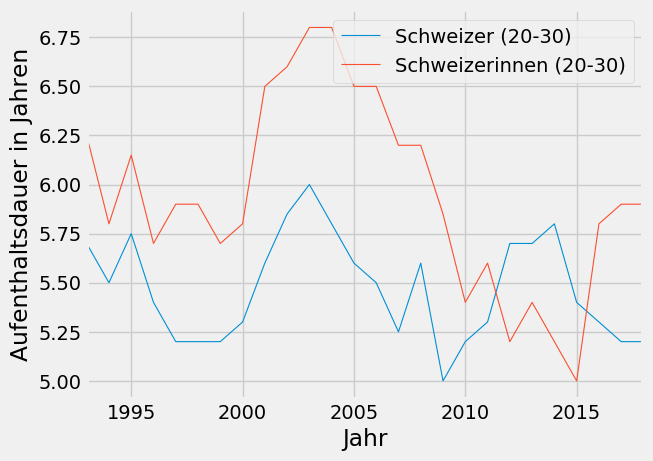

In [64]:
use_style('fivethirtyeight')
fig, ax = plt.subplots()
men_2039_ch_k1.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", label="Schweizer (20-30)", ax=ax, linewidth=0.8)
women_2039_ch_k1.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", label="Schweizerinnen (20-30)", ax=ax, linewidth=0.8)
ax.set_ylabel('Aufenthaltsdauer in Jahren')
ax.set_xlabel('Jahr')

## Und wie sieht das für alle Kreise aus?

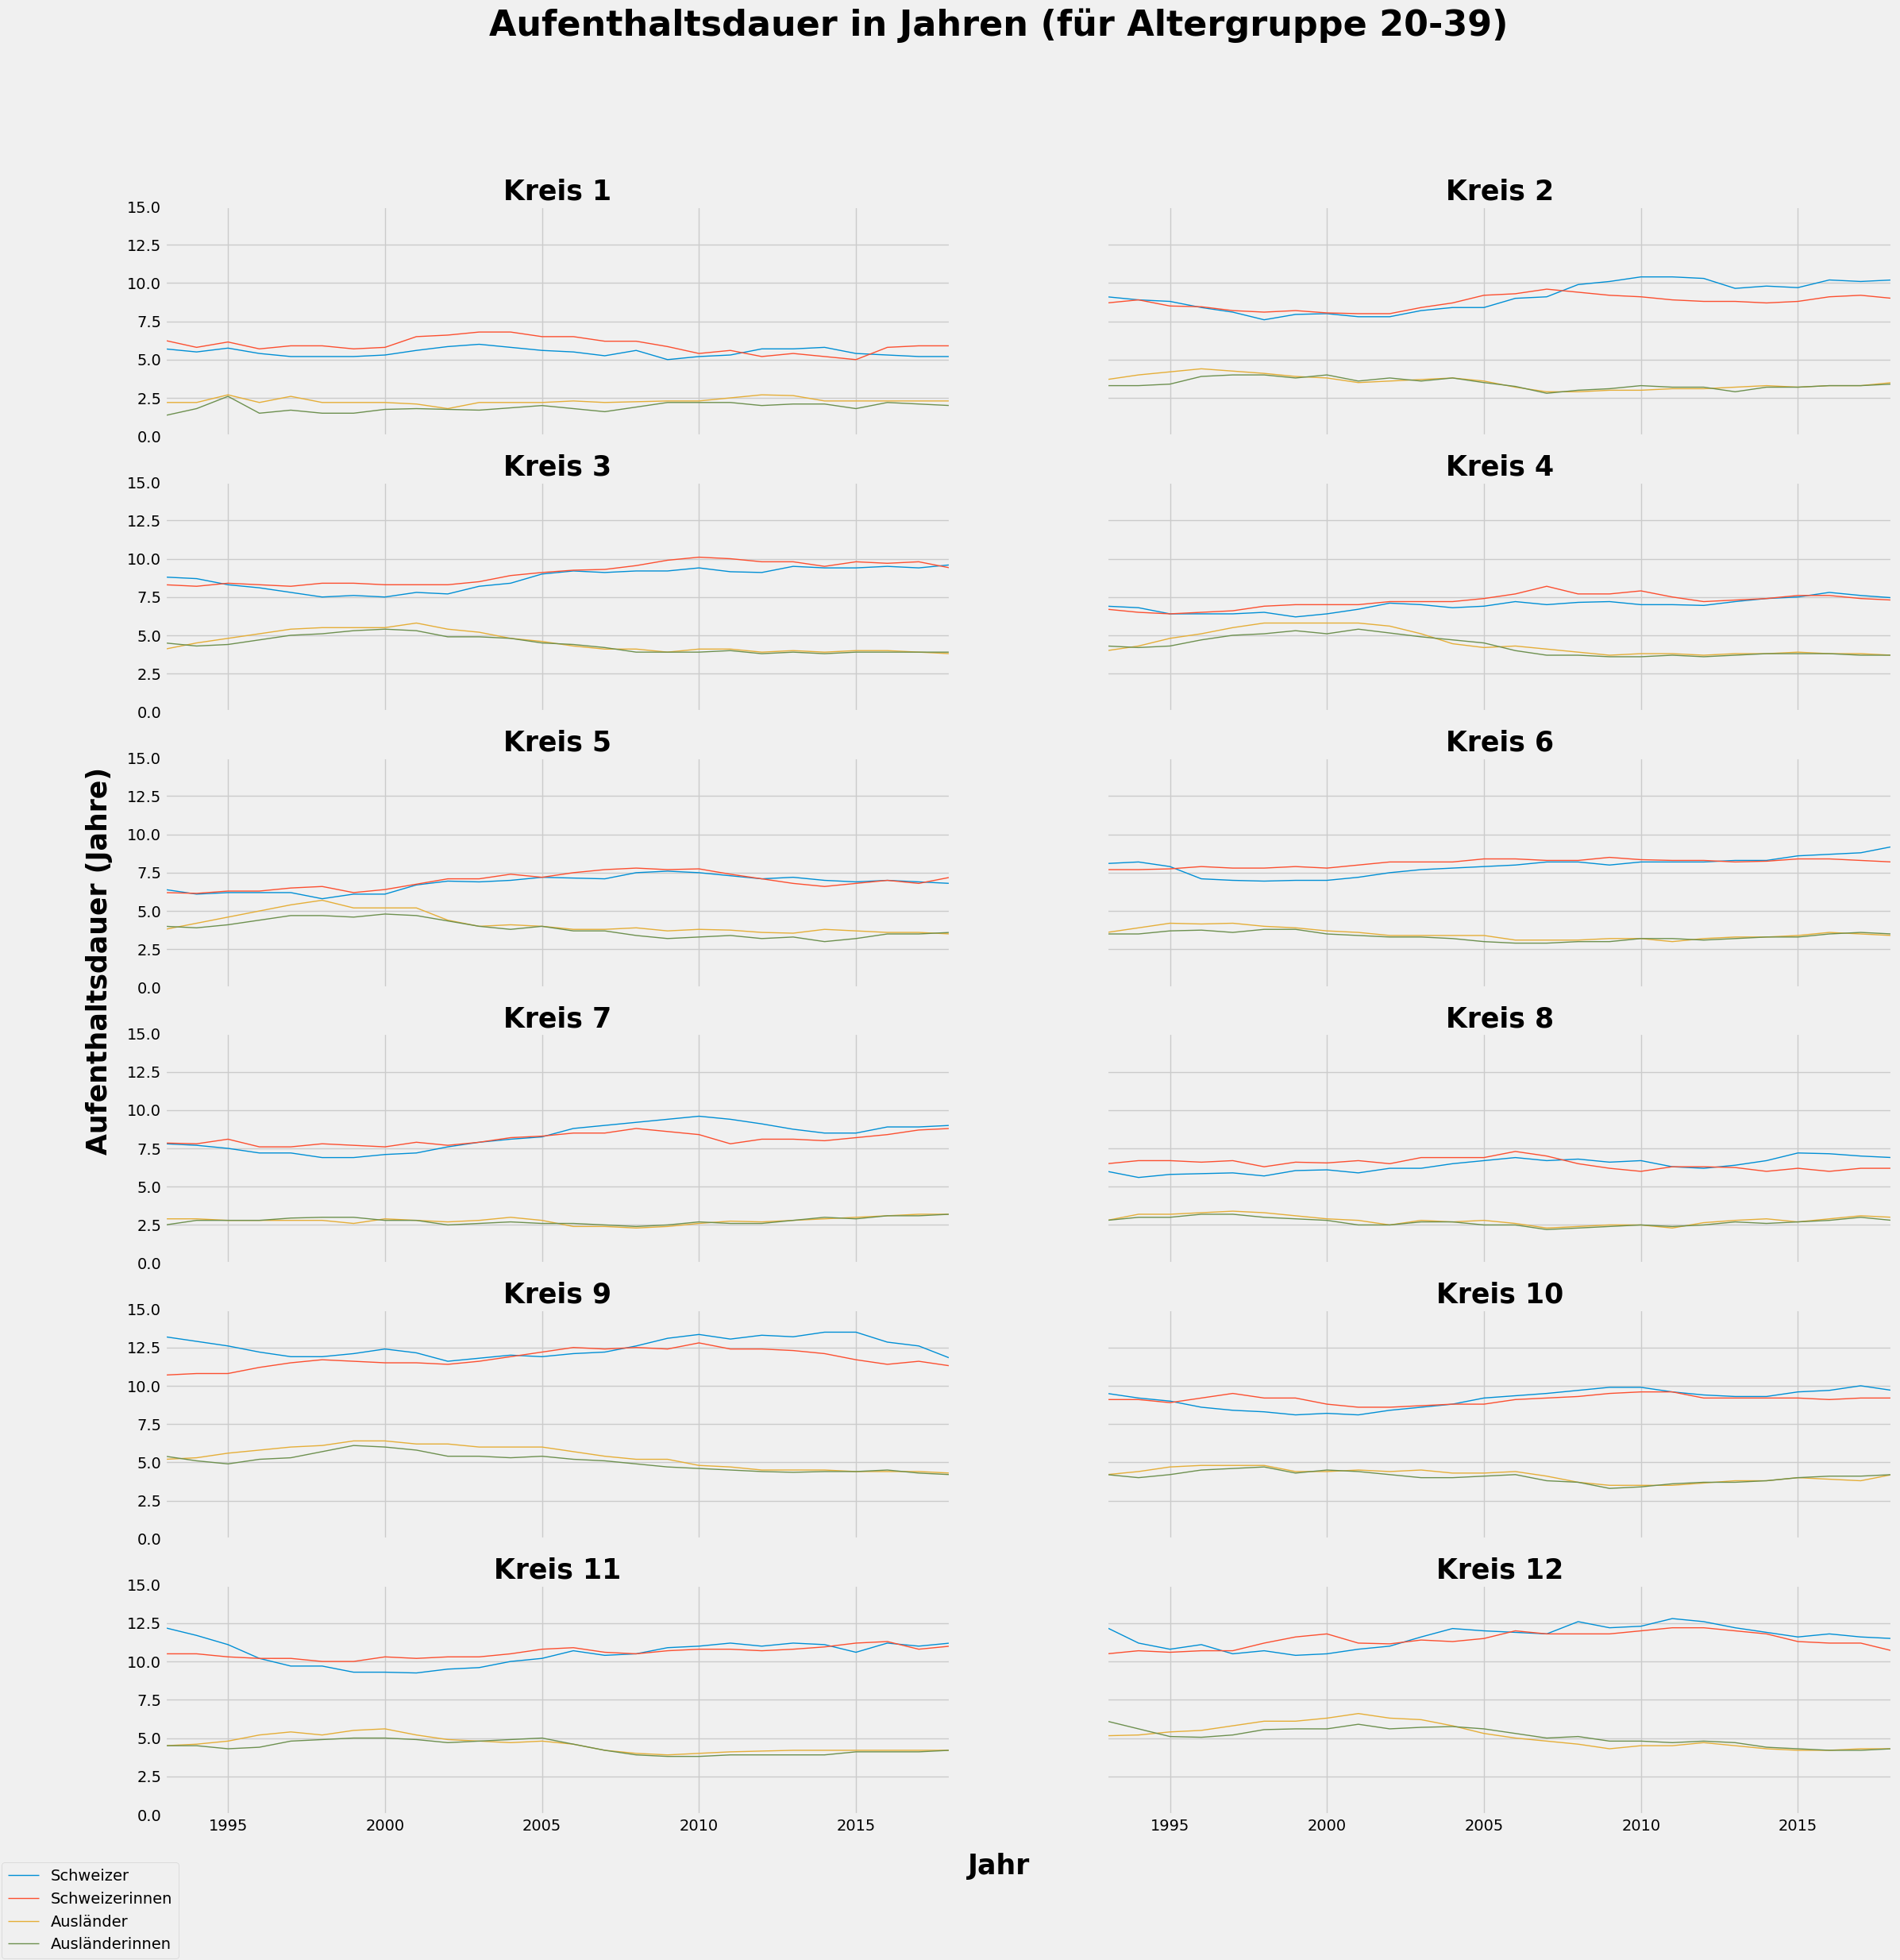

In [57]:
use_style('fivethirtyeight')
rows = 6
cols = 2
linewidth = 1.0
fig, ax = plt.subplots(nrows=rows, ncols=cols, sharey=True, sharex=True, figsize=(25,25))
fig.suptitle('Aufenthaltsdauer in Jahren (für Altergruppe 20-39)', fontsize=32, fontweight='bold');
k = 1
for i in range(rows):
    for j in range(cols):
        ax[i,j].set_ylim([0, 15])
        ax[i,j].set_title(label='Kreis %s' % k, fontdict={"fontsize": 25, "fontweight": 'bold'})
        
        m2039ch = df[(df.SexKurz == 'M') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == k)].reset_index()
        w2039ch = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == k)].reset_index()
        m2039for = df[(df.SexKurz == 'M') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Ausländer/in') & (df.KreisCd == k)].reset_index()
        w2039for = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Ausländer/in') & (df.KreisCd == k)].reset_index()
   
        m2039ch.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=linewidth)
        w2039ch.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=linewidth)
        m2039for.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=linewidth)
        w2039for.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=linewidth)
        
        ax[i,j].legend().set_visible(False)
        ax[i,j].xaxis.label.set_visible(False)
        k = k + 1
        
# Create the legend
fig.legend(handles=ax[(rows-1),(cols-1)].lines,     # The line objects
           labels=[
               'Schweizer',
               'Schweizerinnen',
               'Ausländer',
               'Ausländerinnen',
           ],   # The labels for each line
           loc="lower left",   # Position of legend
           borderaxespad=0.1    # Small spacing around legend box
           )

fig.text(0.5, 0.04, 'Jahr', ha='center', fontdict={"fontsize": 25, "fontweight": 'bold'})
fig.text(0.04, 0.5, 'Aufenthaltsdauer (Jahre)', va='center', rotation='vertical', fontdict={"fontsize": 25, "fontweight": 'bold'})

plt.show()

## Schauen wir uns einen Kreis doch mal im Detail an
Da wir in den Daten die 25. Perzentile, den Median und die 75 Perzenzile haben, können wir die Jahre als Box-Plot darstellen.
Weil unser Dataframe bereits die ausgerechneten Werte hat, müssen wir dem Box-Plot diese Werte mitgeben.
Bei anderen Datensätzen, wird der Boxplot verwendet, um die Verteilung der Daten zu sehen (min/max Werte, Median, Durchschnitt).

In [65]:
kreis = 9
data = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == kreis)].reset_index(drop=True)
raw_stats = data.to_dict('records')
stats = [
    {
        'label': s['StichtagDatJahr'],
        'med': s['AufDauerMedian'],
        'q1': s['AufDauerP25'],
        'q3': s['AufDauerP75'],
        'mean': s['AufDauerMittel'],
        'whislo': 0.0,
        'whishi': 30.0,
        'fliers': []
    } for s in raw_stats]
stats

[{'label': 1993,
  'med': 10.7,
  'q1': 4.4,
  'q3': 23.9,
  'mean': 14.4,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 1994,
  'med': 10.8,
  'q1': 4.4,
  'q3': 24.1,
  'mean': 14.4,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 1995,
  'med': 10.8,
  'q1': 4.7,
  'q3': 24.1,
  'mean': 14.4,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 1996,
  'med': 11.2,
  'q1': 4.7,
  'q3': 24.7,
  'mean': 14.7,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 1997,
  'med': 11.5,
  'q1': 4.7,
  'q3': 25.0,
  'mean': 14.8,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 1998,
  'med': 11.7,
  'q1': 4.6,
  'q3': 23.55,
  'mean': 14.8,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 1999,
  'med': 11.6,
  'q1': 4.5,
  'q3': 22.7,
  'mean': 14.6,
  'whislo': 0.0,
  'whishi': 30.0,
  'fliers': []},
 {'label': 2000,
  'med': 11.5,
  'q1': 4.2,
  'q3': 22.5,
  'mean': 14.4,
  'whislo': 0.0,
  'whishi': 30.0,


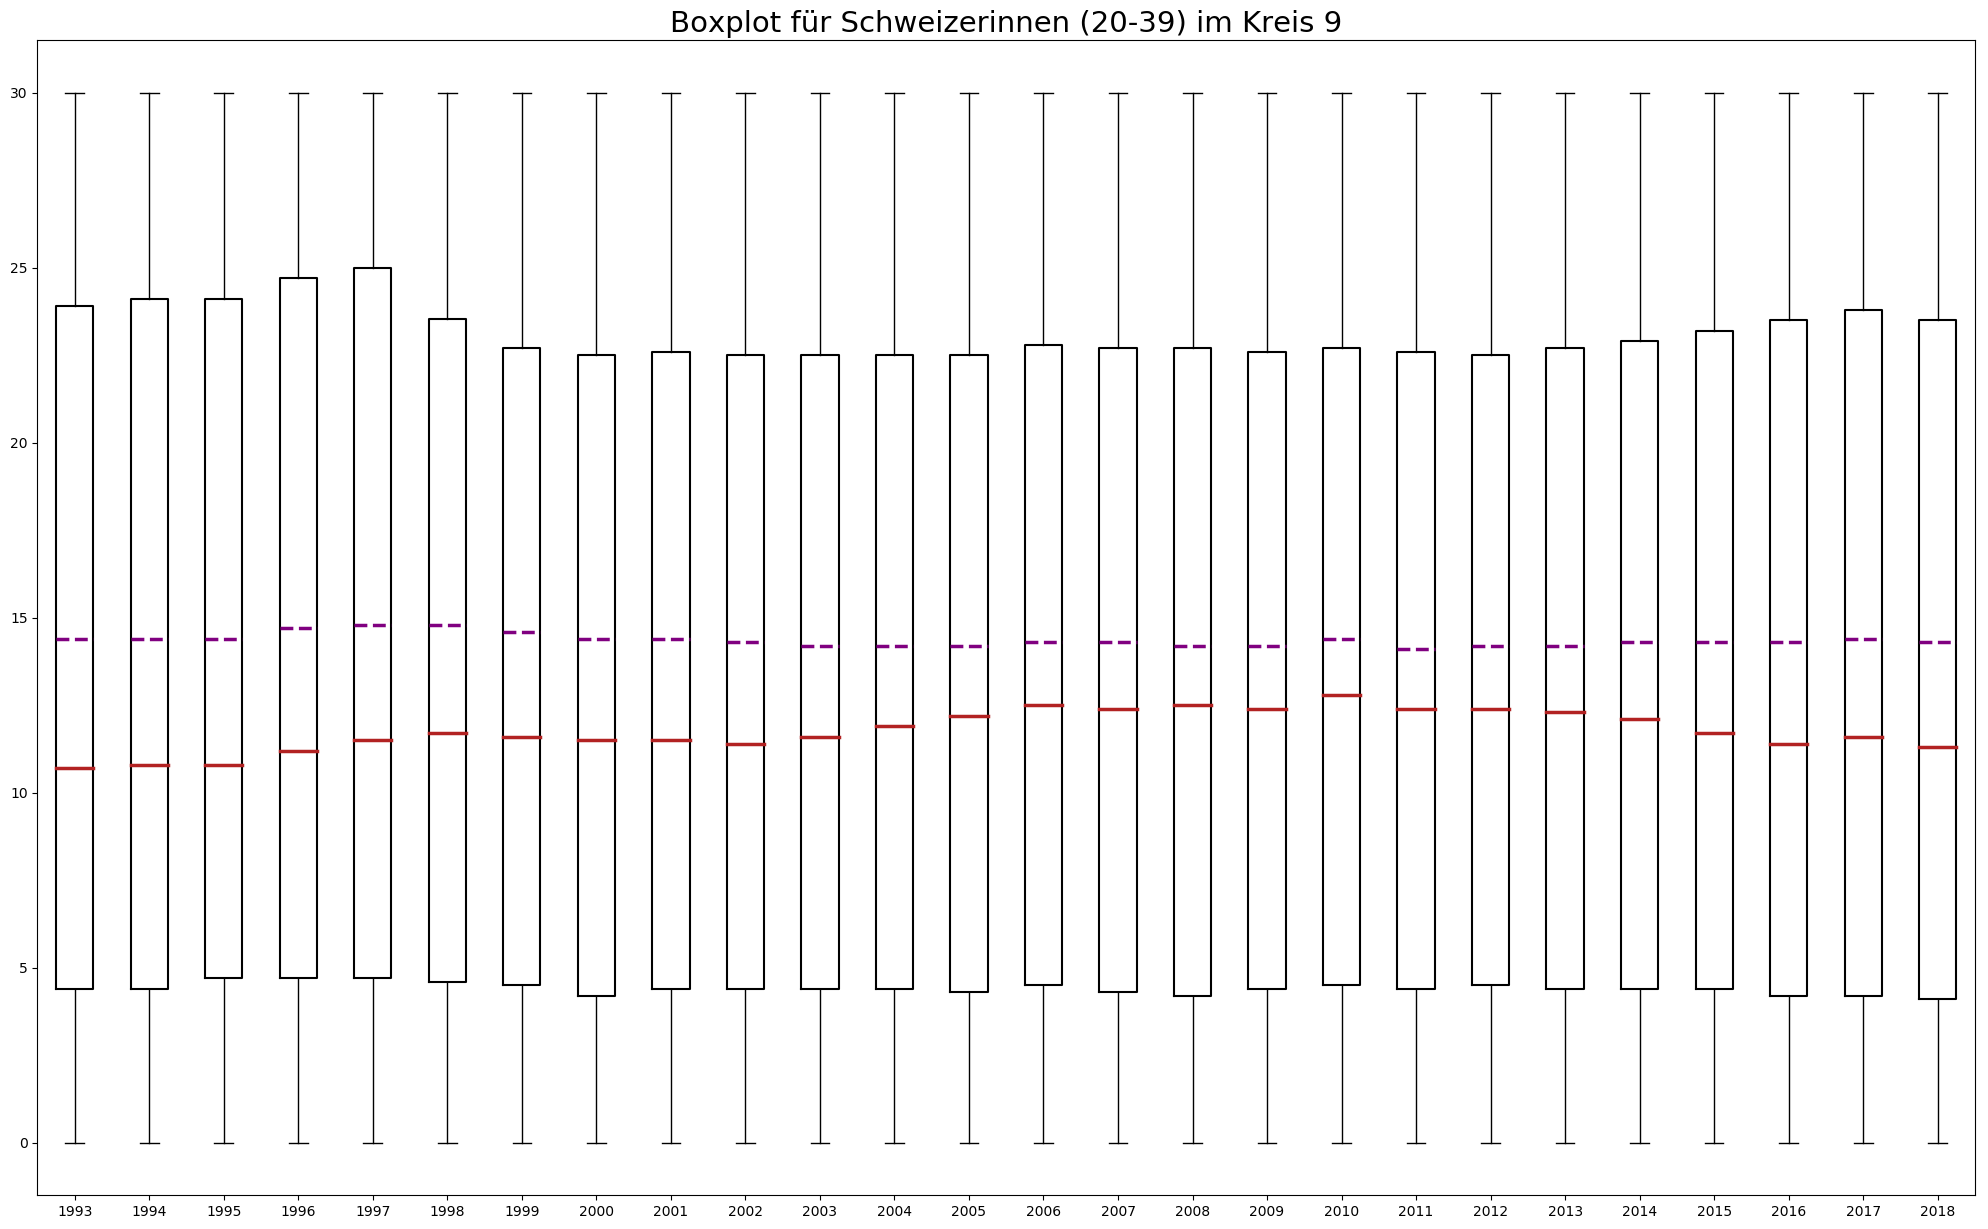

In [66]:
use_style('default')
fs = 21  # fontsize

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15), sharey=True)
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
medianprops = dict(linestyle='solid', linewidth=2.5, color='firebrick')
axes.bxp(stats, showmeans=True, meanline=True, meanprops=meanlineprops, medianprops=medianprops)
axes.set_title('Boxplot für Schweizerinnen (20-39) im Kreis %s' % kreis, fontsize=fs)
plt.show()

# Zum Abschluss noch eine Choropleth-Karte der Median-Werte Ausländerinnen

In [68]:
import folium

In [8]:
# get stadtkreise as GeoJSON
wfs_url = 'https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Stadtkreise'
layer = 'adm_stadtkreise_v'
r = requests.get(wfs_url, params={
    'service': 'WFS',
    'version': '1.0.0',
    'request': 'GetFeature',
    'typename': layer,
    'outputFormat': 'GeoJSON'
})
kreis_geo = r.json()
kreis_geo

{'type': 'FeatureCollection',
 'bbox': [8.44598942, 47.31845142, 8.62811572, 47.4357206],
 'features': [{'type': 'Feature',
   'id': 'adm_stadtkreise_v.1',
   'bbox': [8.548664, 47.350703, 8.625453, 47.39172],
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.548851, 47.36602],
      [8.549008, 47.366011],
      [8.549034, 47.365985],
      [8.549066, 47.365984],
      [8.549067, 47.365984],
      [8.549068, 47.365984],
      [8.549069, 47.365983],
      [8.54907, 47.365983],
      [8.54907, 47.365983],
      [8.549071, 47.365983],
      [8.549072, 47.365983],
      [8.549073, 47.365983],
      [8.549073, 47.365983],
      [8.549074, 47.365983],
      [8.549075, 47.365983],
      [8.549075, 47.365982],
      [8.549076, 47.365982],
      [8.549077, 47.365982],
      [8.549078, 47.365982],
      [8.549079, 47.365981],
      [8.549079, 47.365981],
      [8.549079, 47.365981],
      [8.54908, 47.365981],
      [8.54908, 47.365981],
      [8.549081, 47.365981],
      [8.549082, 47.

In [26]:
# Basiskarte inkl. GeoJSON Layer für Kreise
m = folium.Map(location=[47.38, 8.53], zoom_start=12, tiles=None)
folium.raster_layers.WmsTileLayer(
    url='https://www.ogd.stadt-zuerich.ch/wms/geoportal/Basiskarte_Zuerich_Raster_Grau',
    layers='Basiskarte_Zuerich_Raster_Grau',
    name='Zürich - Basiskarte',
    fmt='image/png',
    overlay=False,
    control=False,
    autoZindex=False,
).add_to(m)
folium.features.GeoJson(kreis_geo).add_to(m)

#bins = list(data['AufDauerMedian'].quantile([0, 0.25, 0.5, 0.75, 1]))

# Choropleth für Median
data = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Ausländer/in') & (df.StichtagDatJahr == 2018)].reset_index()
folium.Choropleth(
    geo_data=kreis_geo,
    name='choropleth',
    data=data,
    columns=['KreisCd', 'AufDauerMedian'],
    key_on='feature.properties.knr',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.4,
    legend_name='Aufenthaltsdauer in Jahren (Median) bei Ausländerinnen (20-39)'
    #bins=bins
).add_to(m)

m